In [42]:
import pandas as pd
import numpy as np
import missingno as msno

import warnings 
warnings.filterwarnings("ignore")



In [43]:
data = pd.read_csv("../data/raw/Aquifer_Petrignano.csv")
print(data.shape)
data.head()

(5223, 8)


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [44]:
data.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [45]:
from datetime import datetime, date

# keeping only the 10 years of data
data = data[data.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True) 
# notna() returns True is value is not null
# when a new dataframe is created after filtering the null values 
# it contains the column index with previous indexes
# reset_index(drop = True) helps in dropping that extra index column from dataframe
data = data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)
data.columns = ['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume', 'Hydrometry']
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y')

print(data.shape)
print(f"Nulls: {data.isnull().sum()}")
data.head()


(4199, 6)
Nulls: Date                     0
Rainfall                 0
Depth_to_groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64


,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [46]:
target = [data['Depth_to_groundwater']]
features = data.drop(['Depth_to_groundwater'], axis = 1)



Text(0.5, 0, 'Date')

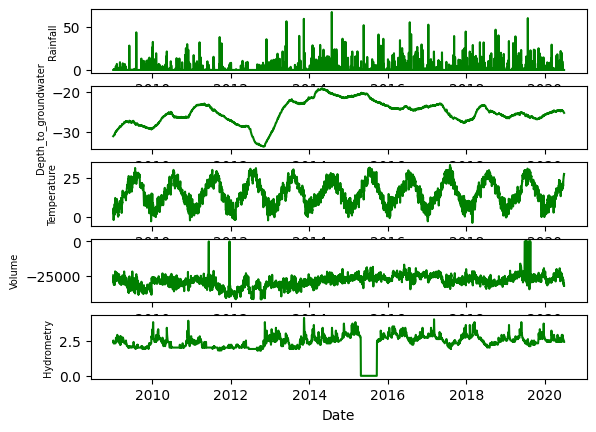

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows = 5, ncols = 1)

for i, col in enumerate(data.drop(['Date'], axis = 1).columns):
    sns.lineplot(x = data['Date'], y = data[col].fillna(method = 'ffill'), ax = ax[i], color = 'green')
    # fillna() function fills the NaN values using ffill method
    # ffill method replace NaN with last valid observation

    ax[i].set_ylabel(col, fontsize = 7)
    
ax[4].set_xlabel('Date')

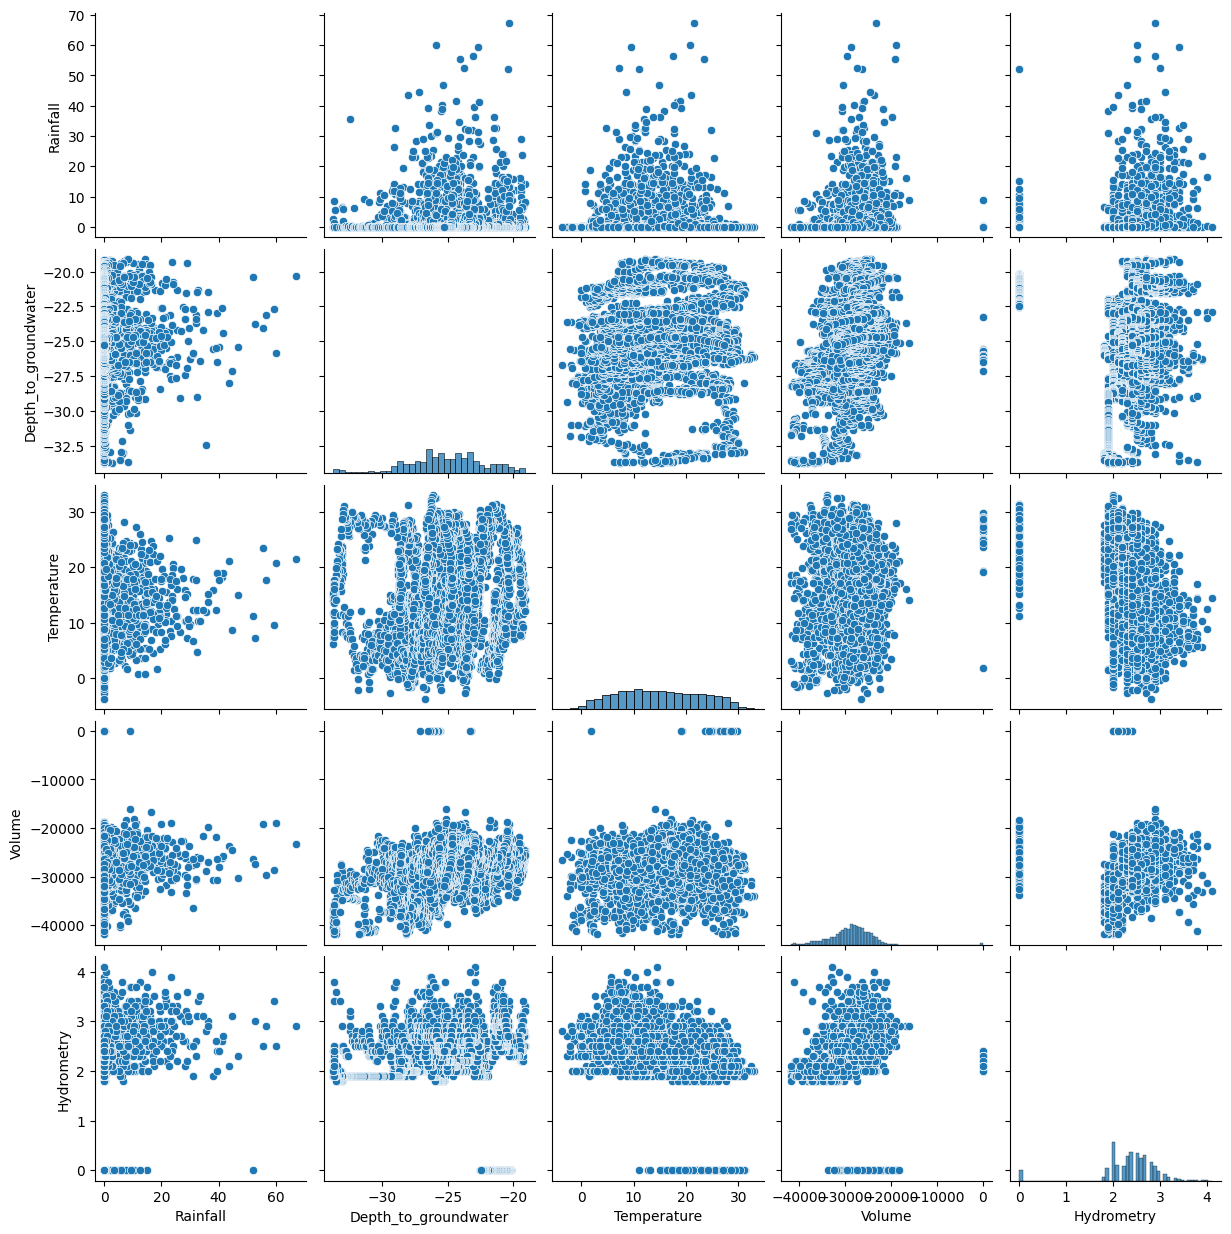

In [48]:
sns.pairplot(data)

In [49]:
# checkear que no falte ningún día y esté en orden cronológico

data = data.sort_values(by='Date')

data['Interval'] = data['Date'] - data['Date'].shift(1)
# shift() function shifts the index by one

print('Sum of all interval between dates: ', data['Interval'].sum())
print('Count number of rows: ', data['Interval'].count())

data = data.drop(['Interval'], axis=1)

print('Conclusion: It is clear that sum of intervals is equal to the number of rows which means dates are in chronological order.')

Sum of all interval between dates:  4198 days 00:00:00
Count number of rows:  4198
Conclusion: It is clear that sum of intervals is equal to the number of rows which means dates are in chronological order.


In [50]:
data.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64

In [51]:
data.head()

,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


<Axes: >

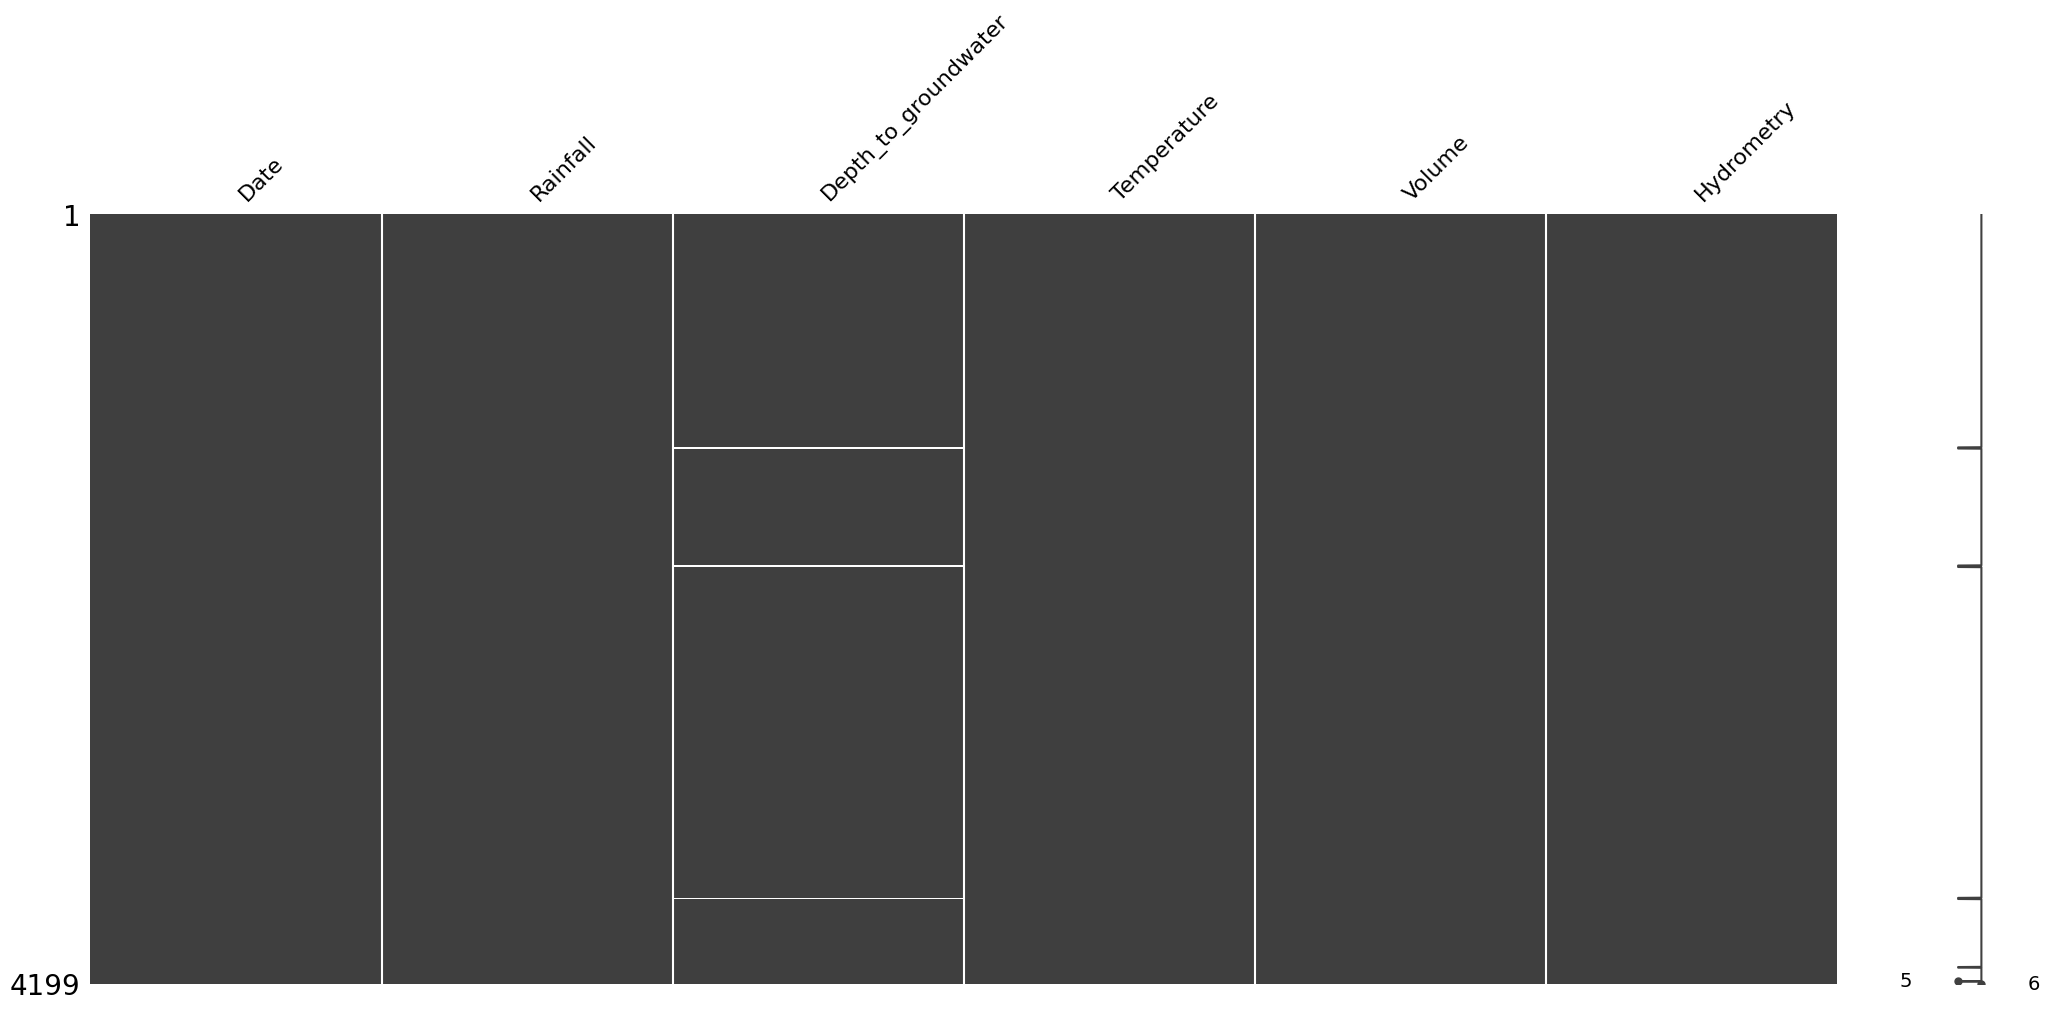

In [52]:
msno.matrix(data)

### Ways to fill NaNs :

In [53]:
#! first we set the null values to NaNs
data['Volume'] = data['Volume'].replace(0, np.nan)
data['Hydrometry'] = data['Hydrometry'].replace(0, np.nan)

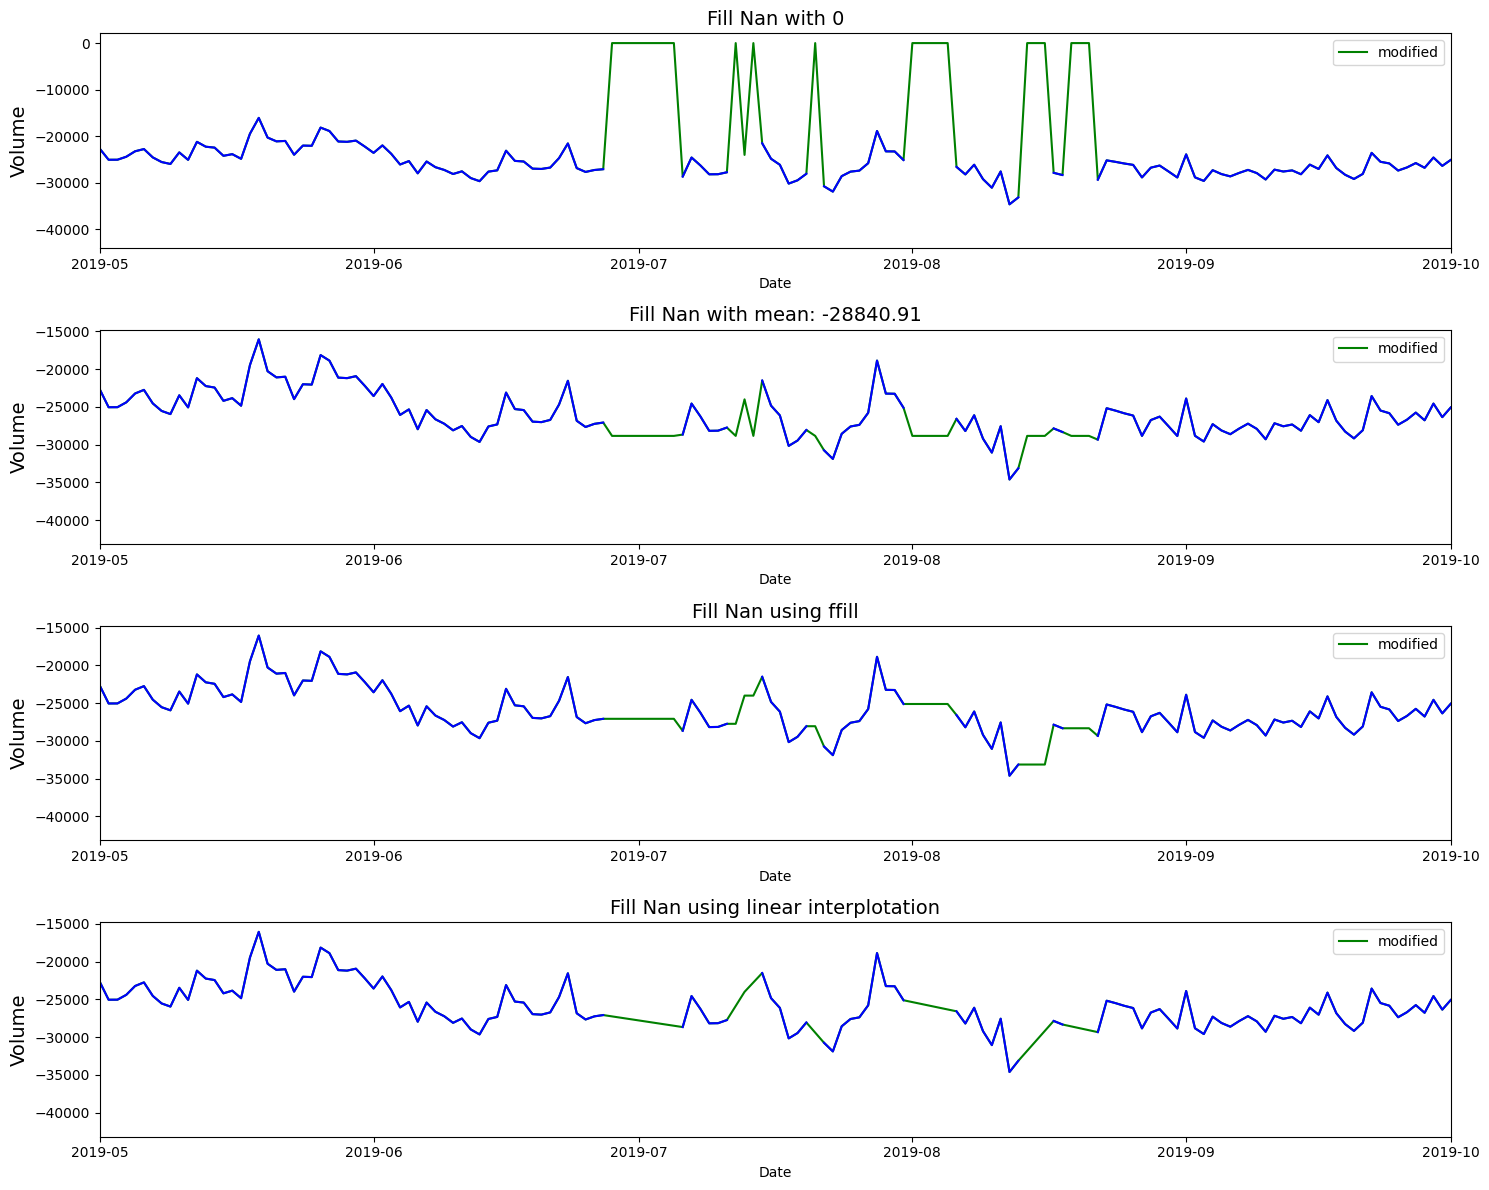

In [54]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 12))

# fill with FIXED value
sns.lineplot(x = data['Date'], y = data['Volume'].fillna(0), ax = ax[0], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data['Volume'].isna().cumsum(), ax = ax[0], palette = ['blue']*sum(data['Volume'].isna()), label = 'original', legend = False)
#? hue argument can be used to put the separate sections in separate buckets. 
#? Though it is faster and easy to read but an outlier in the data which is 
#? surrounded by None will not be drawn on the chart.
#? palette color is set to blue for every section/bucket.
ax[0].set_title('Fill Nan with 0', fontsize =14)
ax[0].set_ylabel(ylabel = 'Volume', fontsize =14)

# fill with MEAN value
mean_val = round(data['Volume'].mean(), 2)
sns.lineplot(x = data['Date'], y = data['Volume'].fillna(mean_val), ax = ax[1], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data["Volume"].isna().cumsum(), ax = ax[1], 
             palette=["blue"]*sum(data["Volume"].isna()), label = 'original', legend = False)
ax[1].set_title(f'Fill Nan with mean: {mean_val}', fontsize = 14)
ax[1].set_ylabel(ylabel = 'Volume', fontsize = 14)


# fill with LAST value (ffill)
sns.lineplot(x = data['Date'], y = data['Volume'].ffill(), ax = ax[2], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data["Volume"].isna().cumsum(), ax = ax[2], 
             palette=["blue"]*sum(data["Volume"].isna()), label = 'original', legend = False)
ax[2].set_title('Fill Nan using ffill', fontsize = 14)
ax[2].set_ylabel(ylabel = 'Volume', fontsize = 14)

# fill with INTERPOLATION (can be polinomial, linear, nearest etc...)

sns.lineplot(x = data['Date'], y = data['Volume'].interpolate(), ax = ax[3], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data["Volume"].isna().cumsum(), ax = ax[3], 
             palette=["blue"]*sum(data["Volume"].isna()), label = 'original', legend = False)
ax[3].set_title('Fill Nan using linear interplotation', fontsize = 14)
ax[3].set_ylabel(ylabel = 'Volume', fontsize = 14)

#! Plotting the charts:
for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()  
plt.show()

#### interpolating seems like the best

In [55]:
data['Volume'] = data['Volume'].interpolate()
data['Hydrometry'] = data['Hydrometry'].interpolate()
data['Depth_to_groundwater'] = data['Depth_to_groundwater'].interpolate()

### Downsizing the volume and temperature from days to months to smoothen the data

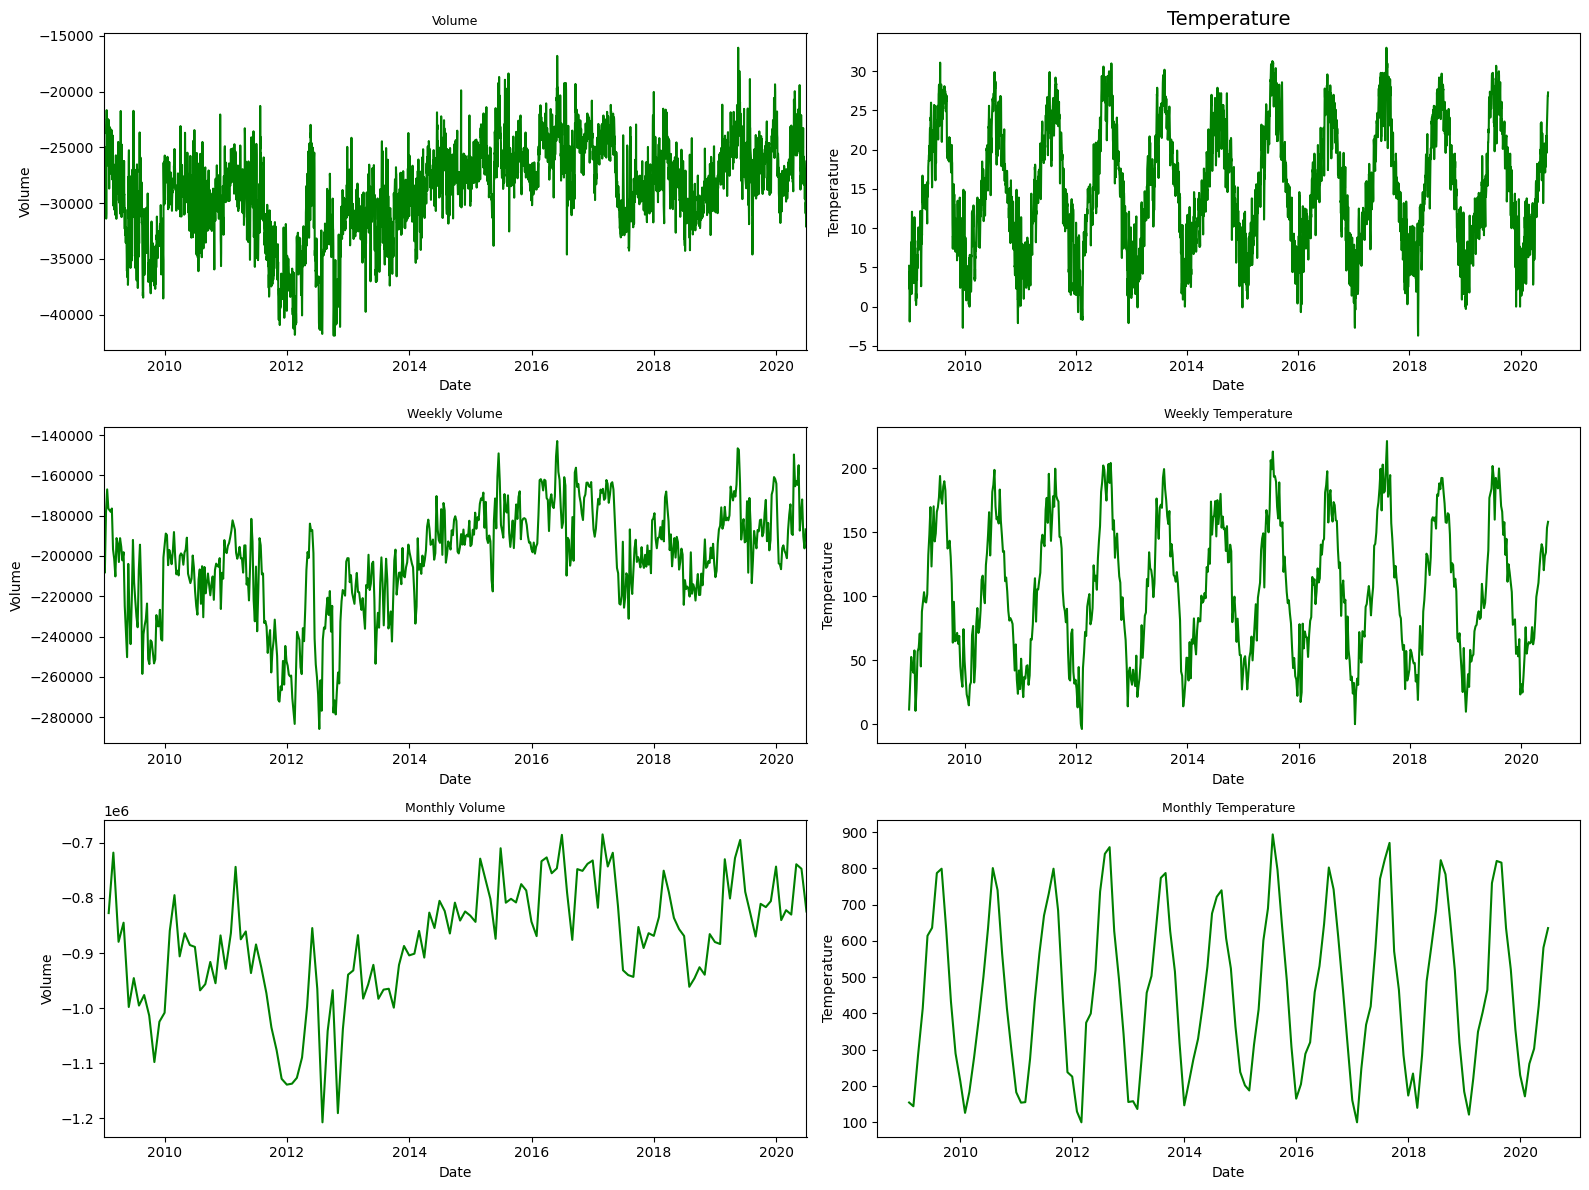

In [56]:
fig, ax = plt.subplots(nrows=3, ncols = 2, figsize = (16, 12))

# this is our actual column
sns.lineplot(x = data['Date'], y = data['Volume'], color = 'green', ax = ax[0, 0])
ax[0, 0].set_title('Volume', fontsize = 9)

# down to a week
resampled_week = data[['Date', 'Volume']].resample('7D', on='Date').sum().reset_index()
sns.lineplot(x = resampled_week["Date"], y = resampled_week['Volume'], color = 'green', ax = ax[1, 0])
ax[1, 0].set_title('Weekly Volume', fontsize=9)

# down to a month
resampled_month = data[['Date', 'Volume']].resample('M', on='Date').sum().reset_index()
sns.lineplot(x = resampled_month['Date'], y = resampled_month['Volume'], color = 'green', ax = ax[2, 0])
ax[2, 0].set_title('Monthly Volume', fontsize = 9)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])


# Now Temperature
sns.lineplot(x = data['Date'], y = data['Temperature'], color = 'green', ax = ax[0, 1])
ax[0, 1].set_title('Temperature', fontsize = 14)

# down to a week
resampled_week = data[['Date', 'Temperature']].resample('7D', on='Date').sum().reset_index()
sns.lineplot(x = resampled_week['Date'], y = resampled_week['Temperature'], color = 'green', ax = ax[1, 1])
ax[1, 1].set_title('Weekly Temperature', fontsize = 9)

# down to a month
resampled_month = data[['Date', 'Temperature']].resample('M', on='Date').sum().reset_index()
sns.lineplot(x = resampled_month['Date'], y = resampled_month['Temperature'], color = 'green', ax = ax[2, 1])
ax[2, 1].set_title('Monthly Temperature', fontsize = 9)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])


plt.tight_layout()
plt.show()


In [57]:
# Weekly downsampling can smooth data and help in analysis
data = data[['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume', 'Hydrometry']].resample('7D', on='Date').sum().reset_index()

##### Modeling


In [63]:
from prophet import Prophet
# timeseries forcaster


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [59]:
# careful split of time series data for training and testing:
features = ['Rainfall', 'Temperature', 'Volume', 'Hydrometry']
target = ['Depth_to_groundwater']

train_size = int(0.8 * len(data)) 

split_data = data[['Date'] + target + features].copy()
split_data.columns = ['ds', 'y'] + features
# Columns named ds i.e. Date and y i.e. Target
# Forecasting models themselves identify ds, y as date and Target value respectively from data.

train = split_data.iloc[:train_size, :]

# Splitting data into training and validation dataset
X_train = pd.DataFrame(split_data.iloc[:train_size, [0, 2, 3, 4, 5]])
y_train = pd.DataFrame(split_data.iloc[:train_size, 1])

X_valid = pd.DataFrame(split_data.iloc[train_size: , [0, 2, 3, 4, 5]])
y_valid = pd.DataFrame(split_data.iloc[train_size: , 1])

train.head()

,ds,y,Rainfall,Temperature,Volume,Hydrometry
0,2009-01-01,-217.34,0.0,11.6,-197154.432,16.6
1,2009-01-08,-215.49,2.0,32.0,-208290.528,16.2
2,2009-01-15,-212.94,0.2,52.7,-178242.336,16.1
3,2009-01-22,-210.13,4.1,43.5,-166980.960,17.5
4,2009-01-29,-208.53,9.9,40.4,-176473.728,17.5


In [69]:
model = Prophet()
for col in features:
    model.add_regressor(col)

model.fit(train)

y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

# Calculate error
# Calculate error
mae = mean_absolute_error(y_valid, y_pred['yhat'])
rmse = np.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')



10:56:03 - cmdstanpy - INFO - Chain [1] start processing
10:56:03 - cmdstanpy - INFO - Chain [1] done processing


MAE: 18.99362870286881
RMSE: 20.318859149505563


#### está fatal pero porque no arreglé lo de seasonality creo